In [ ]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
		'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
train_images.shape

(60000, 28, 28)

In [ ]:
len(train_labels)

60000

In [ ]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [ ]:
test_images.shape

(10000, 28, 28)

In [ ]:
len(test_labels)

10000

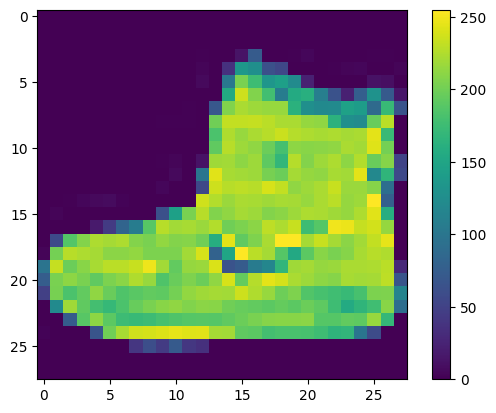

In [ ]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
train_images = train_images / 255.0
test_images = test_images/ 255.0

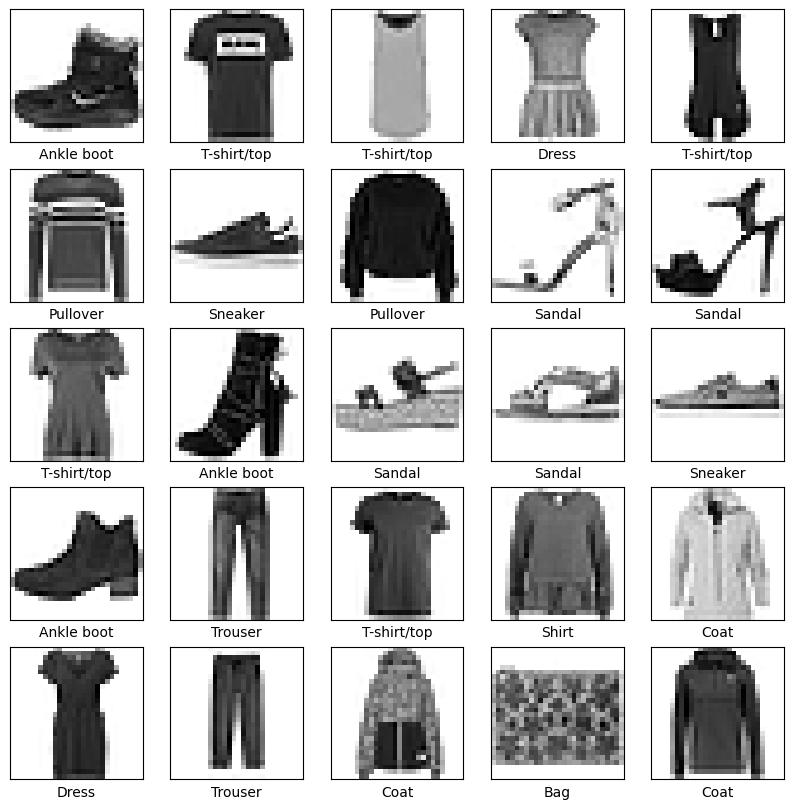

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
	plt.subplot(5,5,i+1)
	plt.xticks([])
	plt.yticks([])
	plt.grid(False)
	plt.imshow(train_images[i], cmap=plt.cm.binary)
	plt.xlabel(class_names[train_labels[i]])
plt.show()

In [ ]:
model = keras.Sequential([
	keras.layers.Flatten(input_shape = (28, 28)),
	keras.layers.Dense(128, activation ='relu'),
	keras.layers.Dense(10, activation ='softmax')
])
model.compile(optimizer='adam',
	loss='sparse_categorical_crossentropy',
	metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.4997 - accuracy: 0.8240
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3792 - accuracy: 0.8630
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3396 - accuracy: 0.8766
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3149 - accuracy: 0.8854
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2981 - accuracy: 0.8903
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2831 - accuracy: 0.8949
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2687 - accuracy: 0.9008
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2588 - accuracy: 0.9038
Epoch 9/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2493 - accuracy: 0.9073
Epoch 10/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.241

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print("\nTest accuracy:', test_acc")


313/313 - 1s - loss: 0.3499 - accuracy: 0.8773 - 673ms/epoch - 2ms/step

Test accuracy:', test_acc


In [ ]:
predictions = model.predict(test_images)
predictions[0]

313/313 [==============================] - 1s 2ms/step


array([2.2305246e-08, 6.1505462e-10, 4.4898055e-10, 6.2917236e-09,
       1.9396641e-10, 3.2218422e-03, 1.0327975e-07, 5.1834609e-02,
       2.9138798e-07, 9.4494307e-01], dtype=float32)

In [ ]:
np.argmax(predictions[0])

9

In [ ]:
test_labels[0]

9

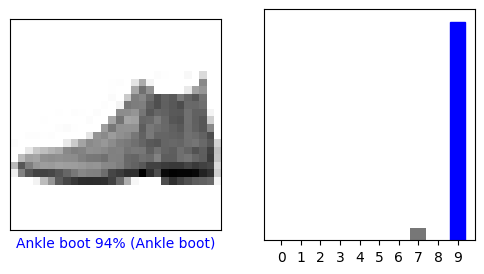

In [ ]:
def plot_image(i, predictions_array, true_label, img):
	predictions_array, true_label, img = predictions_array, true_label[i], img[i]
	plt.grid(False)
	plt.xticks([])
	plt.yticks([])
	plt.imshow(img, cmap = plt.cm.binary)
	predicted_label = np.argmax(predictions_array)
	if predicted_label == true_label:
		color = 'blue'
	else:
		color='red'
	plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
						100*np.max(predictions_array),
						class_names[true_label]),
						color=color)

def plot_value_array(i, predictions_array, true_label):
	predictions_array, true_label = predictions_array, true_label[i]
	plt.grid(False)
	plt.xticks(range(10))
	plt.yticks([])
	thisplot = plt.bar(range(10), predictions_array, color="#777777")
	plt.ylim([0, 1])
	predicted_label = np.argmax(predictions_array)
	thisplot [predicted_label].set_color('red')
	thisplot[true_label].set_color('blue')

i=0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

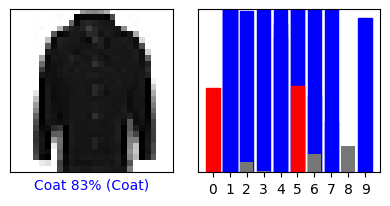

In [ ]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*1+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*1+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [ ]:
img=test_images[1]
print(img.shape)

(28, 28)


In [ ]:
img=(np.expand_dims(img,0))
print(img.shape)

(1, 28, 28)


In [ ]:
predictions_single = model.predict(img)
print(predictions_single)

1/1 [==============================] - 0s 80ms/step
[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]


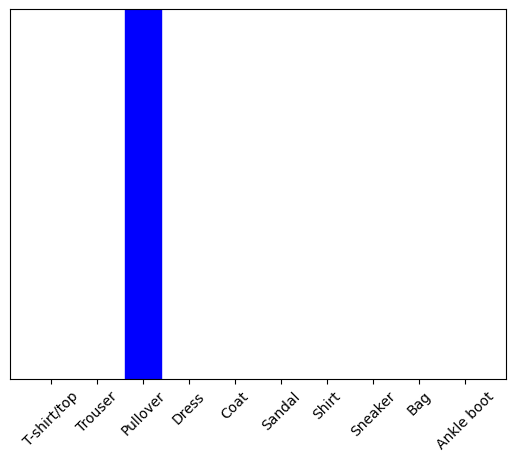

In [ ]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [ ]:
np.argmax(predictions_single[0])

2